# 《神经网络与深度学习》学习笔记
## 第3章 线性模型
* 线性模型是机器学习中应用最广泛的模型，形如：$f\left(\mathbf{x} ; \mathbf{w}\right)=\mathbf{w}^{\mathrm{T}}\mathrm{x} + b$。
* 分类问题中，输出目标$y$是一些离散的标签，而$f\left(\mathbf{x} ; \mathbf{w}\right)$的值域为实数，因此需要引入一个非线性的决策函数$g(*)$来预测输出目标，形如：$y=g\left(f\left(\mathbf{x} ; \mathbf{w}\right)\right)$。

### 3.1 线性判别函数和决策边界

#### 3.1.1 两分类问题
* 空间内满足$f\left(\mathrm{x} ; \mathrm{w}\right) = 0$的点组成的超平面称为决策边界或者决策平面。

#### 3.1.2 多分类问题
* 有多个决策平面。
* 判别方式：一对其余、一对一、argmax。

### 3.2 Logistic回归
* $ p \left(y = 0|\mathbf{x}\right) = \frac{1}{1+\exp{\left(-\mathbf{w}^{\mathrm{T}}\mathbf{x}\right)}}$
* $ \mathbf{w}^{\mathrm{T}}\mathbf{x} = \log\frac{p \left(y = 1|\mathbf{x}\right)}{p \left(y = 0|\mathbf{x}\right)}$
#### 3.2.1 参数学习
* 梯度下降法、牛顿法

### 3.3 Softmax回归
* $p \left(y = c|\mathbf{x}\right) = \frac{\exp{\left(\mathbf{w}^{\mathrm{T}}_{c}\mathbf{x}\right)}}{\sum_{c'=1}^{C}\exp{\left(\mathbf{w}^{\mathrm{T}}_{c'}\mathbf{x}\right)}}$
* $\mathbf{\hat{y}} = \frac{\exp\left(W^{\mathrm{T}}\mathbf{x}\right)}{\mathbf{1}^{\mathrm{T}}\exp\left(W^{\mathrm{T}}\mathbf{x}\right)}$

#### 3.3.1 参数学习
* 同Logistic

### 3.4 感知器
* 感知器是一种使用广泛的线性分类器，是最简单的神经网络，只有一个神经元。
* $\hat{y} = \mathrm{sgn}\left(\mathbf{w}^{\mathrm{T}}\mathbf{x}\right)$

#### 3.4.1 参数学习
* $y\mathbf{w}^{\mathrm{T}}\mathbf{x}<0$时，$\mathbf{w} \leftarrow \mathbf{w}+y \mathbf{x}$

#### 3.4.2 感知器的收敛性
* 感知器具有收敛性，算法会在$\frac{R^2}{\gamma^{2}}$步内收敛，具体看教材。

#### 3.4.3 参数平均感知器
* 投票感知器：
  * $\hat{y} = \mathrm{sgn}\left(\sum^{K}_{k=1} c_{k} \mathrm{sgn}\left(\mathbf{w}_{k}^{T}\mathbf{x}\right)\right)$
* 平均感知器：
  * $\hat{y} = \mathrm{sgn}\left(\sum^{K}_{k=1} c_{k} \left(\mathbf{w}_{k}^{T}\mathbf{x}\right)\right) = \mathrm{sgn}\left(\bar{\mathbf{w}}^{T}\mathbf{x}\right)$

#### 3.4.4 扩展到多类分类

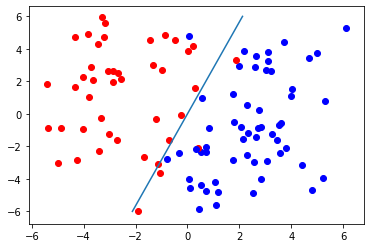

In [5]:
# 感知器Pytorch实现
import torch
import matplotlib.pyplot as plt

N = 100

# 数据生成
X = torch.rand([2, N]) * 10 - 5
W = torch.rand([2, 1]) - 0.5
W_a = torch.ones([2, 1])
Y = W.t().mm(X).sign()
X += torch.rand([2, N]) * 3 - 1.5 # 添加噪声

# 散点绘制
for i in range(N):
    plt.scatter(X[0][i],X[1][i],c=("red" if Y[0][i]>0 else "blue"))

# W_a拟合
for i in range(N):
    y = Y.index_select(1,torch.LongTensor([i]))
    x = X.index_select(1,torch.LongTensor([i]))
    if y.mm(W.t().mm(X))[0][0] < 0:
         W_a += y[0][0] * x

k =  - W_a[0] / W_a[1]
mx, my = (6, 6*k) if abs(k) < 1 else (6/k, 6)

plt.plot([mx, -mx], [my, -my])
plt.show()

### 3.5 支持向量机
* SVM是一个经典的两类分类算法，鲁棒性更好。
* SVM的核心就是找到一个超平面使得$\gamma$最小，$\gamma$的含义是所有点与超平面的距离中最短的一条。

#### 3.5.1 参数学习
* 拉格朗日乘数法，再用SMO算法凸优化。

#### 3.5.2 核函数
* $\begin{aligned} f(\mathbf{x}) &=\operatorname{sgn}\left(\mathbf{w}^{* \mathrm{T}} \phi(\mathbf{x})+b^{*}\right) \\ &=\operatorname{sgn}\left(\sum_{n=1}^{N} \lambda_{n}^{*} y^{(n)} K\left(\mathbf{x}^{(n)}, \mathbf{x}\right)+b^{*}\right) \end{aligned}$

#### 3.5.3 软间隔
* 核函数核软间隔有点难懂，时间有点赶，先抓一下进度，回头再来好好看这些。

### 3.6 损失函数对比
* 仔细看图，除了平方损失函数，其他损失函数都适用与两类分类问题。